In [131]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import visualize_correlation as VizCorr
import seaborn as sns

In [132]:
marketing_data = pd.read_csv("marketing_campaign.csv", delimiter="\t")
marketing_data = marketing_data.dropna()

In [133]:
print(len(marketing_data[marketing_data["AcceptedCmp1"] == 1]))
print(len(marketing_data[marketing_data["AcceptedCmp2"] == 1]))
print(len(marketing_data[marketing_data["AcceptedCmp3"] == 1]))
print(len(marketing_data[marketing_data["AcceptedCmp4"] == 1]))
print(len(marketing_data[marketing_data["AcceptedCmp5"] == 1]))
print(len(marketing_data[marketing_data["Response"] == 1]))

142
30
163
164
162
333


In [134]:
spending_vals = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

In [135]:
for col in spending_vals:
    _min = np.min(marketing_data[col])
    _max = np.max(marketing_data[col])
    marketing_data[col] = (marketing_data[col] - _min) / (_max - _min)
print(marketing_data['MntFishProducts'])

0       0.664093
1       0.007722
2       0.428571
3       0.038610
4       0.177606
          ...   
2235    0.162162
2236    0.000000
2237    0.123552
2238    0.308880
2239    0.007722
Name: MntFishProducts, Length: 2216, dtype: float64


In [136]:
columns_to_keep = []
for col in marketing_data.columns:
    num_of_uniques = len(marketing_data[col].unique())
    if num_of_uniques > 1:
        columns_to_keep.append(col)
marketing_data = marketing_data[columns_to_keep]

In [137]:
promotion_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
accepted_promotion = np.repeat(0, len(marketing_data))
for i in range(0, len(marketing_data)):
    record = marketing_data.iloc[i]
    for col in promotion_cols:
        if record[col] == 1:
            accepted_promotion[i] = 1
marketing_data["AcceptedPromotion"] = accepted_promotion

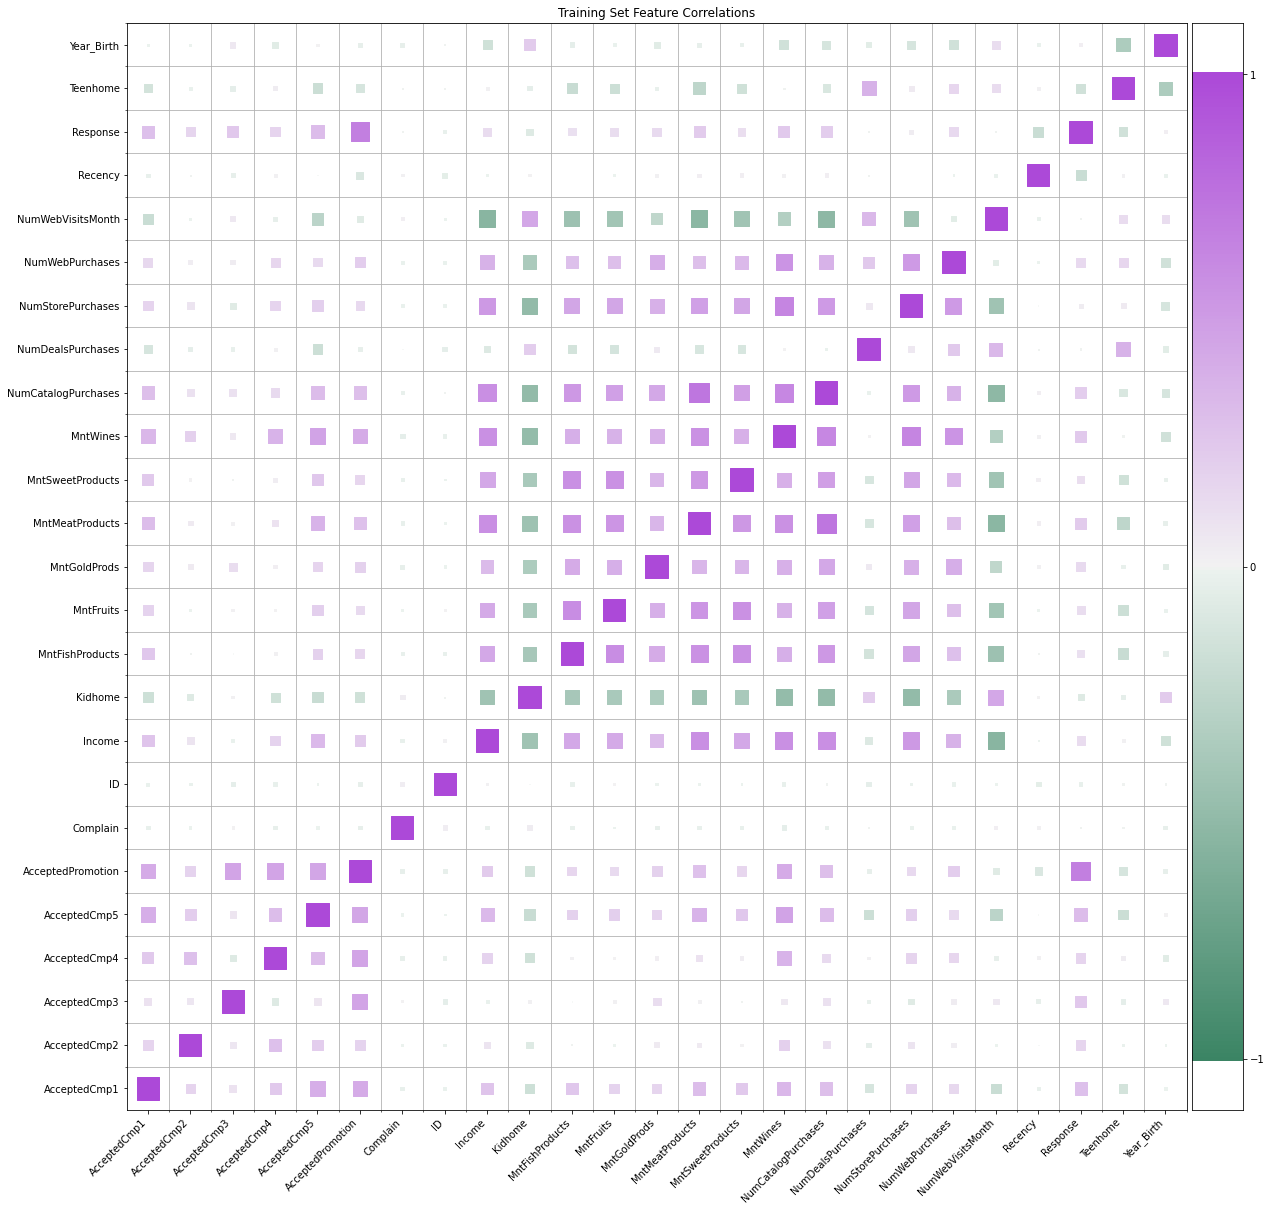

In [138]:
VizCorr.get_correlation_matrix(marketing_data, "Training Set Feature Correlations")

In [147]:
amounts = np.repeat(0, len(marketing_data))

for col in spending_vals:
    amounts = amounts + marketing_data[col]
marketing_data["Total Amounts"] = amounts

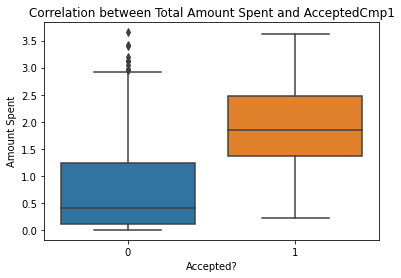

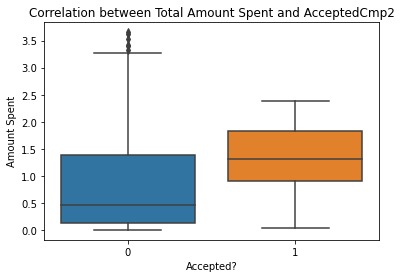

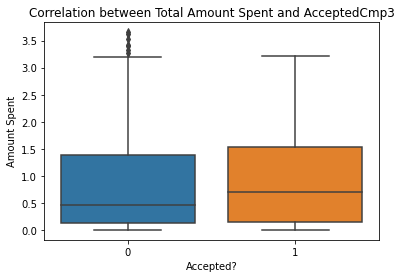

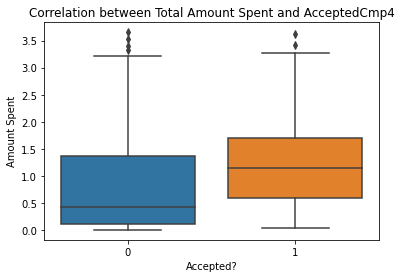

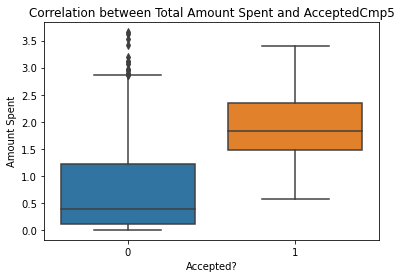

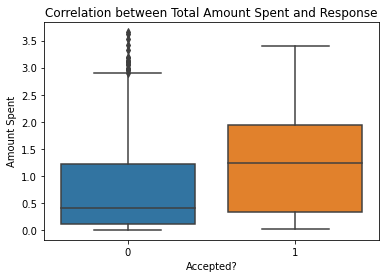

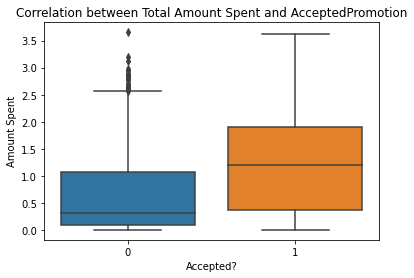

In [148]:
for promotion in promotion_cols:     
    sns.boxplot(x=marketing_data[promotion], y=marketing_data["Total Amounts"], data=marketing_data)
    plt.title("Correlation between Total Amount Spent and " + promotion)
    plt.ylabel("Amount Spent")
    plt.xlabel("Accepted?")
    plt.show()
    plt.close()

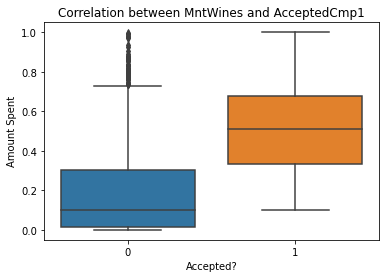

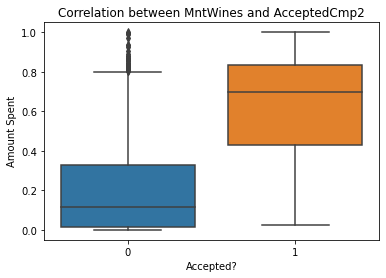

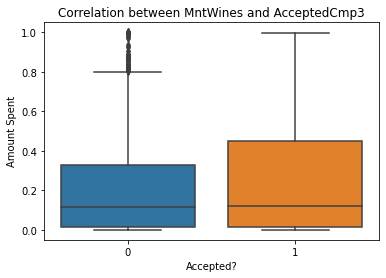

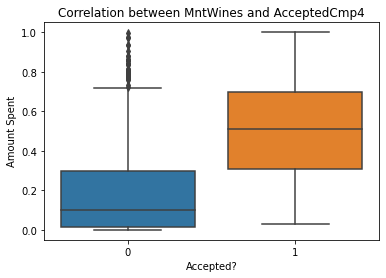

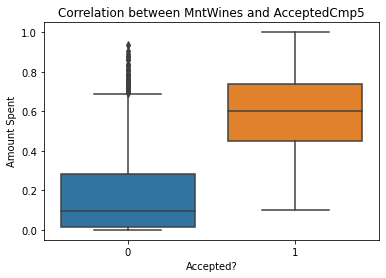

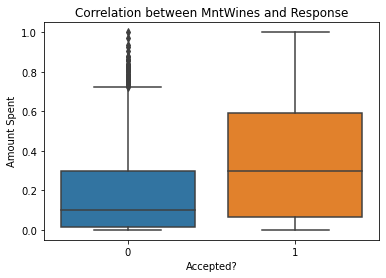

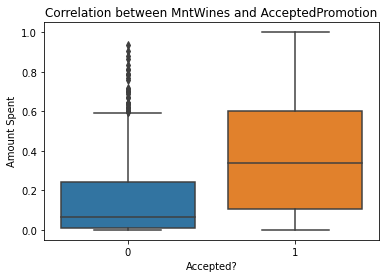

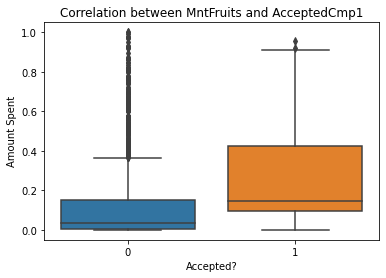

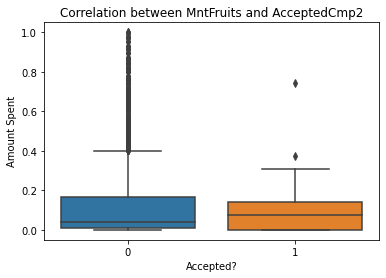

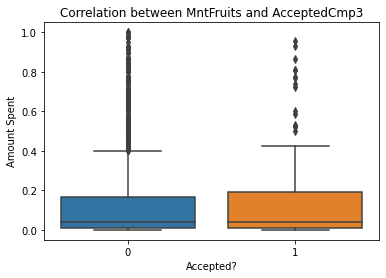

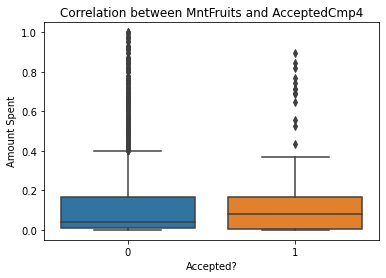

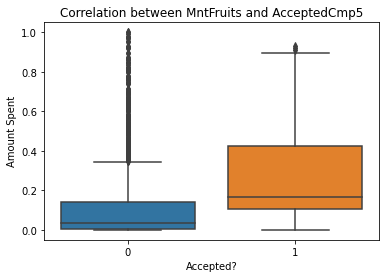

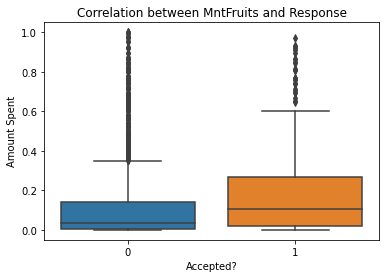

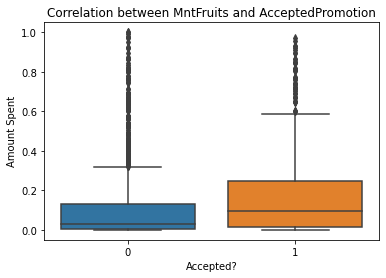

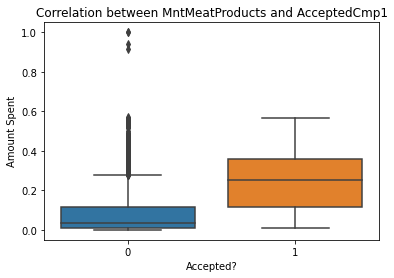

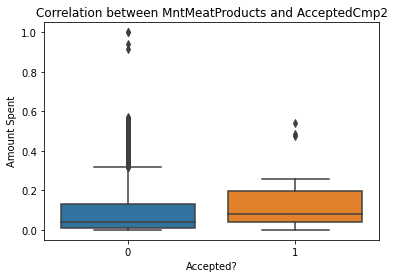

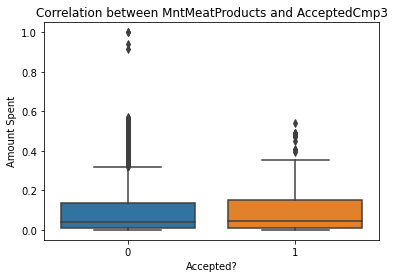

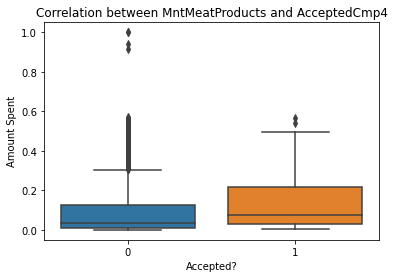

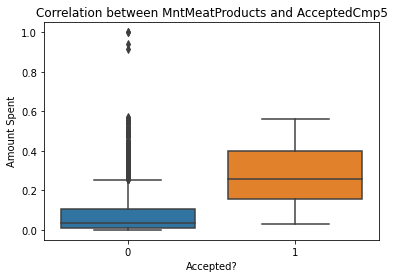

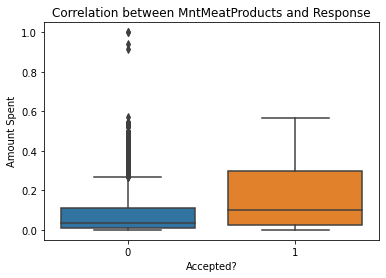

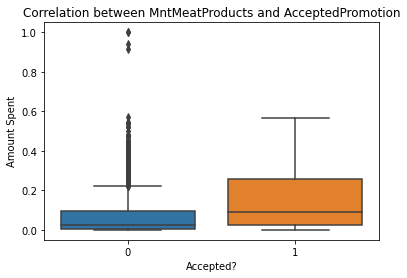

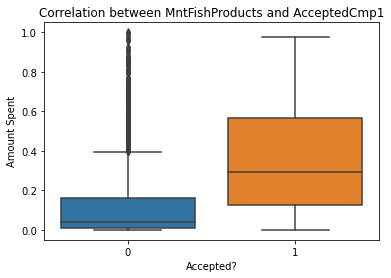

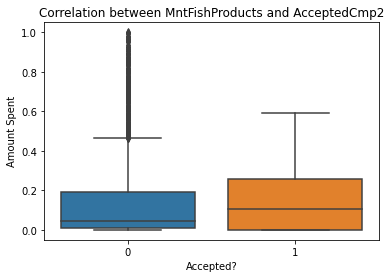

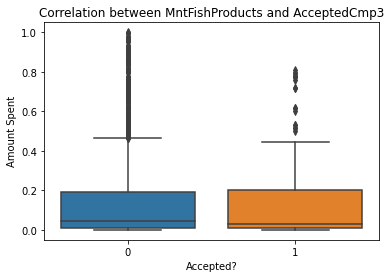

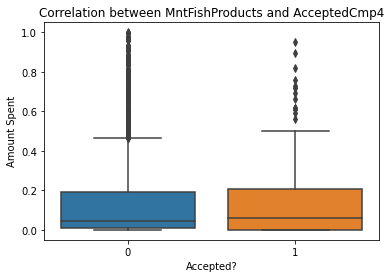

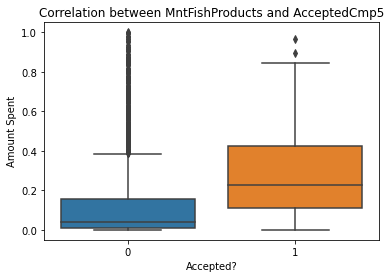

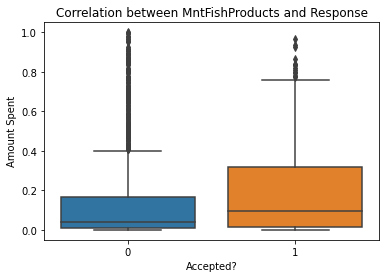

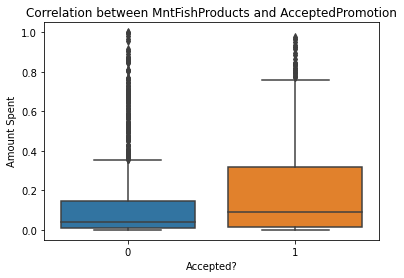

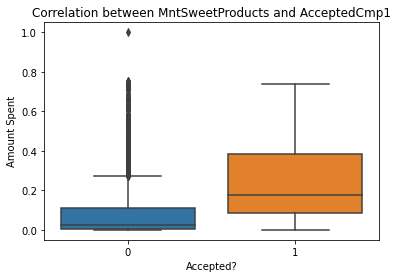

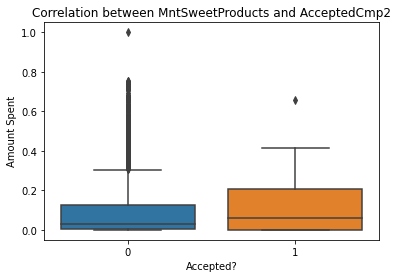

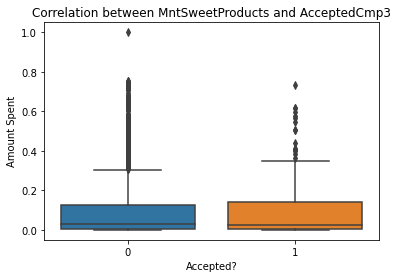

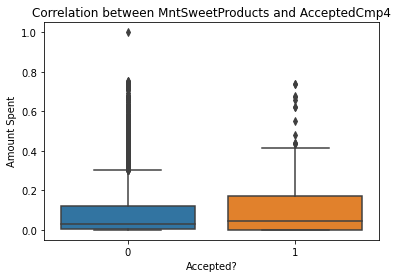

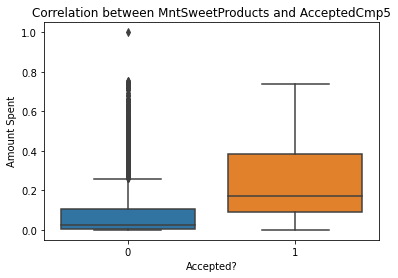

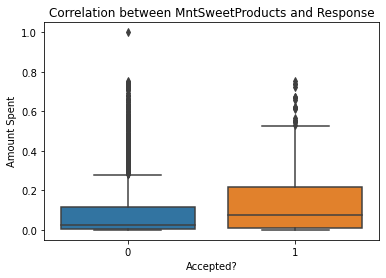

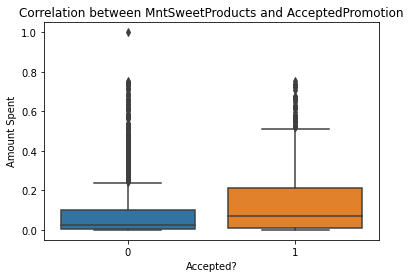

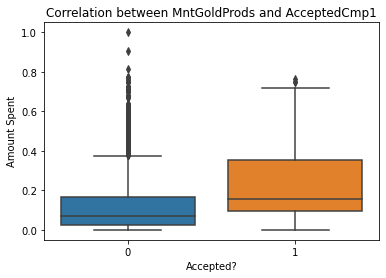

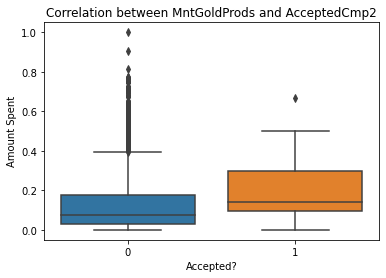

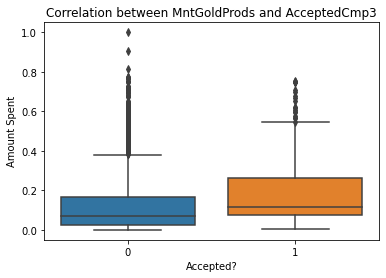

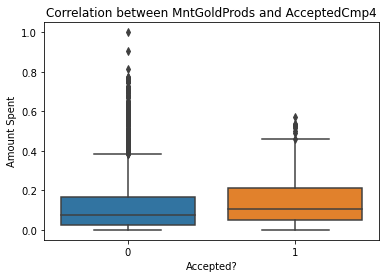

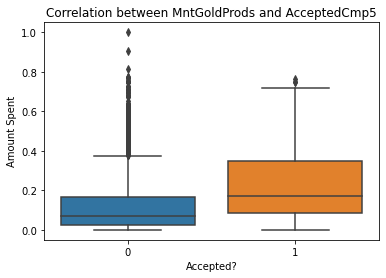

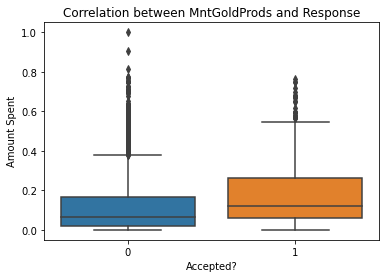

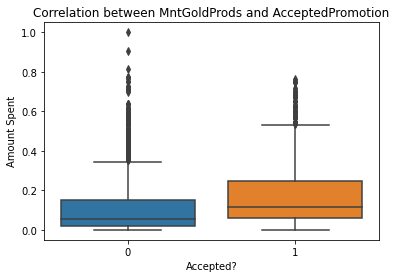

In [146]:
promotion_cols.append("AcceptedPromotion")

for mnt in spending_vals:   
    for promotion in promotion_cols:     
        sns.boxplot(x=marketing_data[promotion], y=marketing_data[mnt], data=marketing_data)
        plt.title("Correlation between " + mnt + " and " + promotion)
        plt.ylabel("Amount Spent")
        plt.xlabel("Accepted?")
        plt.show()
        plt.close()

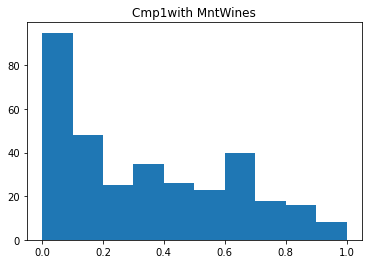

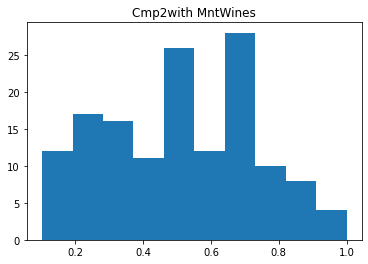

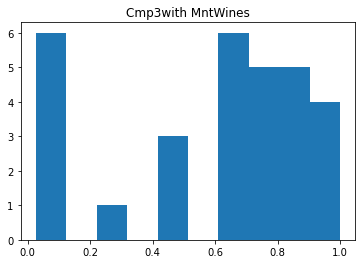

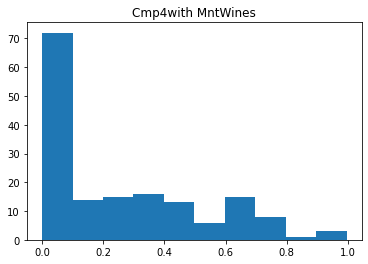

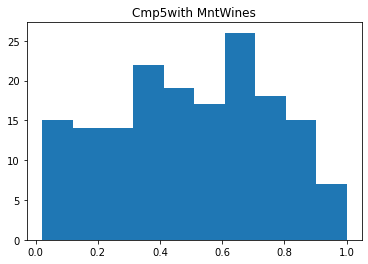

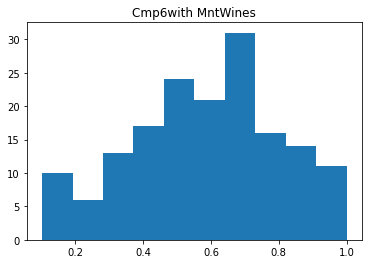

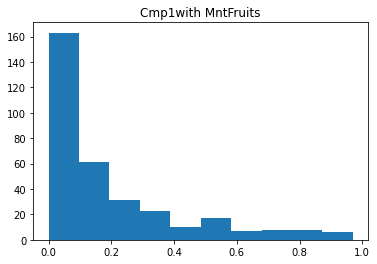

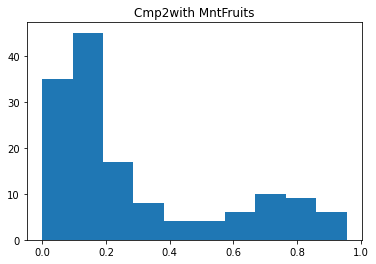

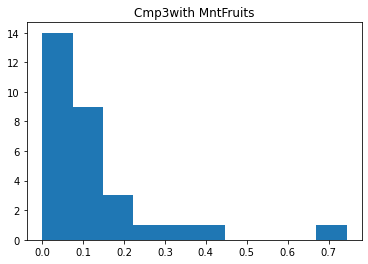

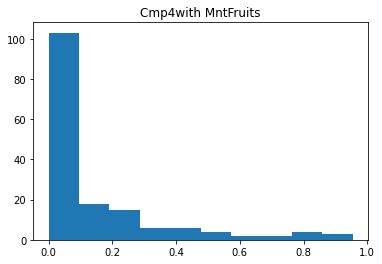

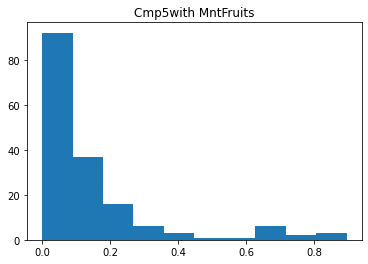

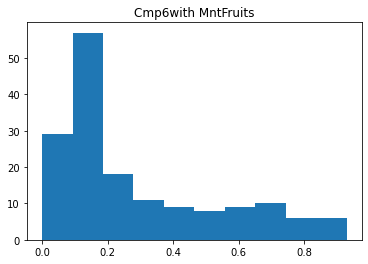

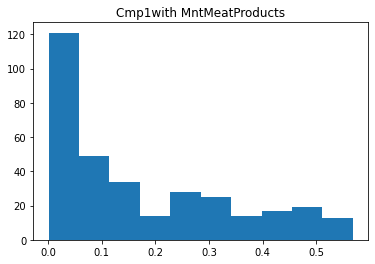

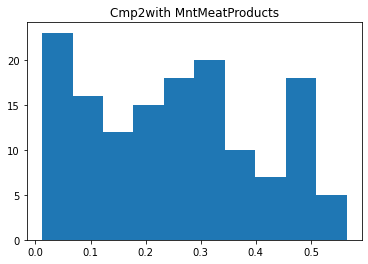

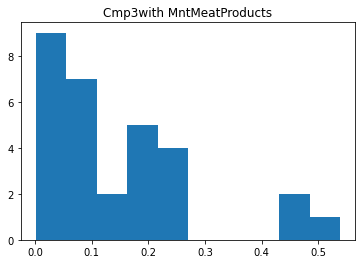

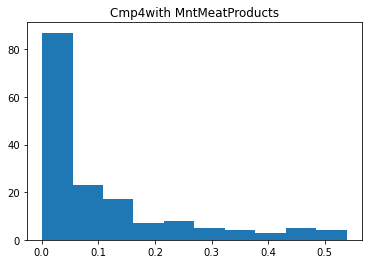

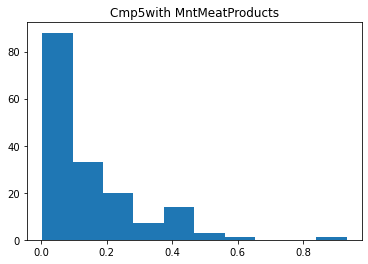

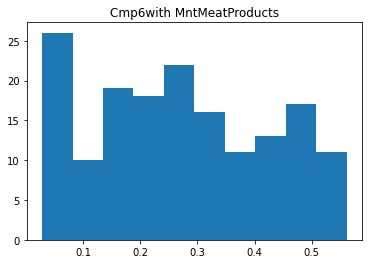

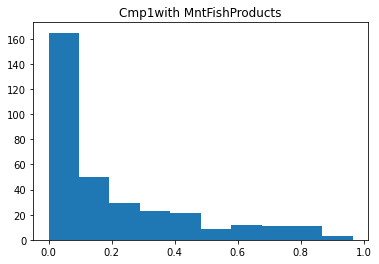

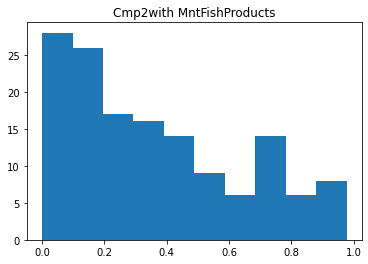

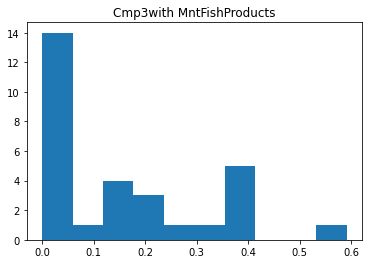

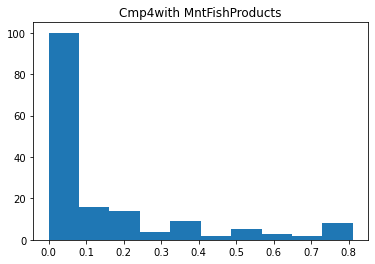

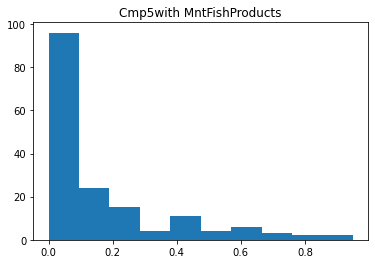

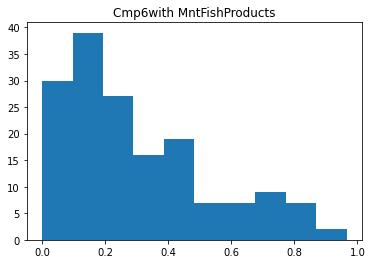

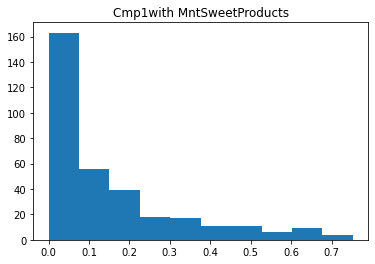

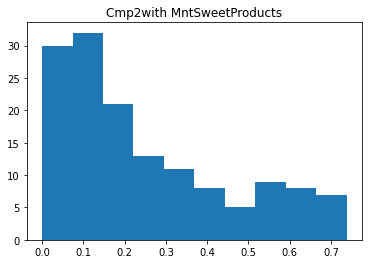

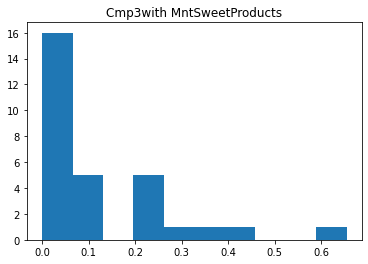

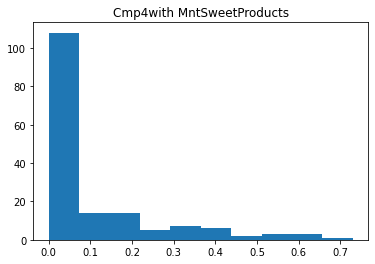

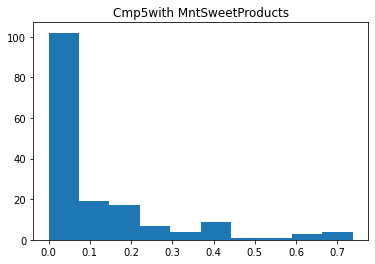

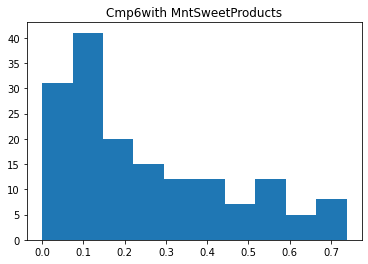

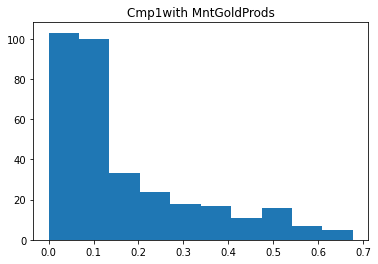

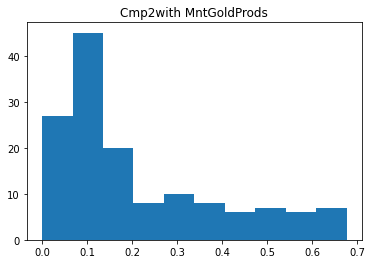

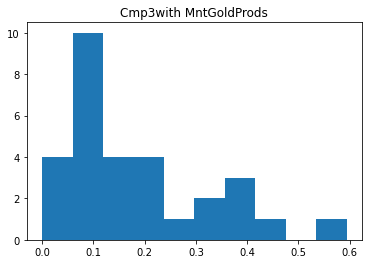

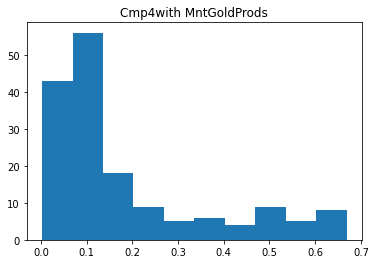

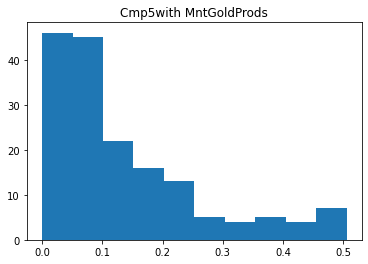

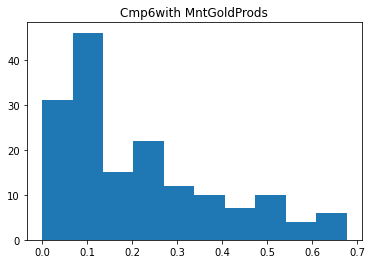

In [94]:
cmp1 = marketing_data[marketing_data["AcceptedCmp1"] == 1]
cmp2 = marketing_data[marketing_data["AcceptedCmp2"] == 1]
cmp3 = marketing_data[marketing_data["AcceptedCmp3"] == 1]
cmp4 = marketing_data[marketing_data["AcceptedCmp4"] == 1]
cmp5 = marketing_data[marketing_data["AcceptedCmp5"] == 1]
cmp6 = marketing_data[marketing_data["Response"] == 1]

datasets = [cmp6, cmp1, cmp2, cmp3, cmp4, cmp5]
for col in spending_vals:
    dataset_num = 1
    for dataset in datasets:
        plt.hist(dataset[col])
        plt.title("Cmp" + str(dataset_num) + "with " + col)
        plt.show()
        plt.close()
        dataset_num = dataset_num + 1
    
    
# Next, let's normalize the amounts and get a better idea of where more spending is happening

#plt.hist(cmp1["MntMeatProducts"])
#plt.hist(cmp1["MntFishProducts"])
#plt.hist(cmp2["MntMeatProducts"])
#plt.hist(cmp3["MntMeatProducts"])
#plt.hist(cmp4["MntMeatProducts"])
#plt.hist(cmp5["MntMeatProducts"])
#plt.hist(cmp6["MntMeatProducts"])

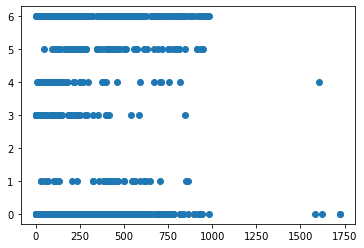

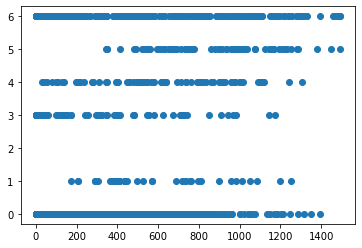

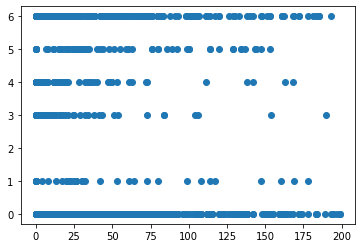

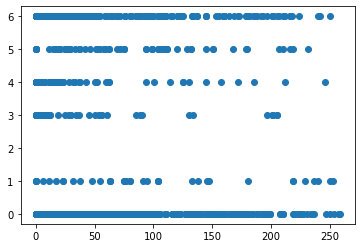

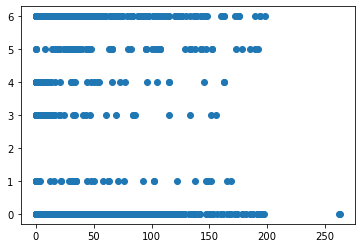

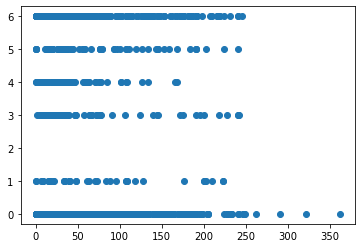

In [7]:
plt.scatter(marketing_data["MntMeatProducts"], marketing_data["CampaignAccepted"])
plt.show()
plt.close()

plt.scatter(marketing_data["MntWines"], marketing_data["CampaignAccepted"])
plt.show()
plt.close()

plt.scatter(marketing_data["MntFruits"], marketing_data["CampaignAccepted"])
plt.show()
plt.close()

plt.scatter(marketing_data["MntFishProducts"], marketing_data["CampaignAccepted"])
plt.show()
plt.close()

plt.scatter(marketing_data["MntSweetProducts"], marketing_data["CampaignAccepted"])
plt.show()
plt.close()

plt.scatter(marketing_data["MntGoldProds"], marketing_data["CampaignAccepted"])
plt.show()
plt.close()

Conjecture: The amount of money spent on specific products will link to the promotion that they acccept.

Solution: We do accept this conjecture only for promotions 1 and 5 and products 